<h1>Credit Card Fraud</h1>

In this example, we use VerticaPy to detect fraudulent credit card transactions. You can download the Jupyter notebook <a href="credit-card-fraud.ipynb">here</a>.

The <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Credit Card Fraud Detection dataset</a> contains credit card transactions from September 2013 by European cardholders. It contains numerical input variables from a principal component analysis (PCA) transformation.

To preserve the cardholders' confidentiality, we cannot access the original features and background information about the data.

"Time" and "Amount" are the only features that have not been transformed with PCA.

<ul class="ul_content">
    <li><b>V1, V2,..., V28</b> : principal components from PCA</li>
    <li><b>Time</b> : Number of seconds elapsed between this transaction and the first transaction in the dataset</li>
    <li><b>Amount</b> : Transaction amount</li>
    <li><b>Class</b> : Response variable, where a value of 1 indicates fraudulent activity</li>
</ul>

"Amount" will be useful for example-dependent cost-sensitive learning.

We will follow the entire Data Science cycle (Data Exploration, Data Preparation, Data Modeling, Model Evaluation, Model Deployment) to solve this problem.

## Initialization

This example uses the following version of VerticaPy:

In [1]:
import verticapy as vp
vp.__version__

'0.9.0'

Connect to Vertica. This example uses an existing connection called "VerticaDSN." For details on how to create a connection, use see the <a href="../../connection.php">connection tutorial</a>.

In [2]:
vp.connect("VerticaDSN")

Let's create a Virtual DataFrame of the dataset.

Time                    V1                     V2                     V3   \\
1         0      -1.3598071336738    -0.0727811733098497       2.53634673796914   \\
2         0      1.19185711131486       0.26615071205963       0.16648011335321   \\
3         1     -1.35835406159823      -1.34016307473609       1.77320934263119   \\
4         1    -0.966271711572087     -0.185226008082898       1.79299333957872   \\
5         2     -1.15823309349523      0.877736754848451         1.548717846511   \\
6         2    -0.425965884412454      0.960523044882985       1.14110934232219   \\
7         4      1.22965763450793      0.141003507049326     0.0453707735899449   \\
8         7     -0.89428608220282      0.286157196276544     -0.113192212729871   \\
9         7    -0.644269442348146       1.41796354547385        1.0743803763556   \\
10        9     -0.33826175242575       1.11959337641566       1.04436655157316   \\
11       10      0.38497821518095      0.616109459176472     -0.874299702595052   \\
12       10        1.249998742053      -1.22163680921816      0.383930151282291   \\
13       10      1.44904378114715      -1.17633882535966      0.913859832832795   \\
14       11       1.0693735878819      0.287722129331455      0.828612726634281   \\
15       12      -2.7918547659339     -0.327770756658658       1.64175016056605   \\
16       12    -0.752417042956605      0.345485415344747       2.05732291276727   \\
17       12      1.10321543528383    -0.0402962145973447        1.2673320885949   \\
18       13    -0.436905071360625      0.918966212909322       0.92459077438817   \\
19       14     -5.40125766315825      -5.45014783420644       1.18630463143652   \\
20       15       1.4929359769862      -1.02934573189487       0.45479473374366   \\
21       16     0.694884775607337      -1.36181910308009       1.02922103956032   \\
22       17     0.962496069914852       0.32846102605212      -0.17147905415064   \\
23       18     0.247491127783665      0.277665627353681       1.18547084217971   \\
24       18      1.16661638244228      0.502120087854101    -0.0673003143663533   \\
25       22      -2.0742946722629     -0.121481799450951       1.32202063048967   \\
26       22     -1.94652513121534    -0.0449005054418194     -0.405570068378956   \\
27       23    -0.414288810090829      0.905437322625407       1.72745294417921   \\
28       23      1.05938711501788     -0.175319186719244       1.26612964251002   \\
29       23      1.17328461017079      0.353497876646456       0.28390506526532   \\
30       23      1.32270726911234      -0.17404083293642      0.434555031250987   \\
31       24      1.23742903021294     0.0610425841868962      0.380525879794222   \\
32       25      1.11400859541157     0.0855460896870318      0.493702487395368   \\
33       26     -0.53538776309446      0.865267807575272       1.35107628772237   \\
34       26     -0.53538776309446      0.865267807575272       1.35107628772237   \\
35       26    -0.529912284186556      0.873891581460326       1.34724732930113   \\
36       26    -0.529912284186556      0.873891581460326       1.34724732930113   \\
37       27     -1.45218727859439       1.76512373913739      0.611668540757038   \\
38       27    -0.246045948703835       0.47326690335701       1.69573755374059   \\
39       29     0.996369531566045      -0.12258878723806      0.546819472613086   \\
40       29      1.11088034163339      0.168716770722767      0.517143960377807   \\
41       32     -2.00887179458613       2.19852650316899      0.144241739942708   \\
42       32      1.24905471963177     -0.624727077037783     -0.710588903536079   \\
43       33    -0.935731508971261      0.170415774156885       2.74626126916024   \\
44       33    -0.607877142993026       1.03134507783793       1.74044973731533   \\
45       34    -0.762255665726893      0.127767751953647       2.65005638571315   \\
46       34    -0.291540244596543      0.445575313725742        1.2497521162384   \\
47       34 
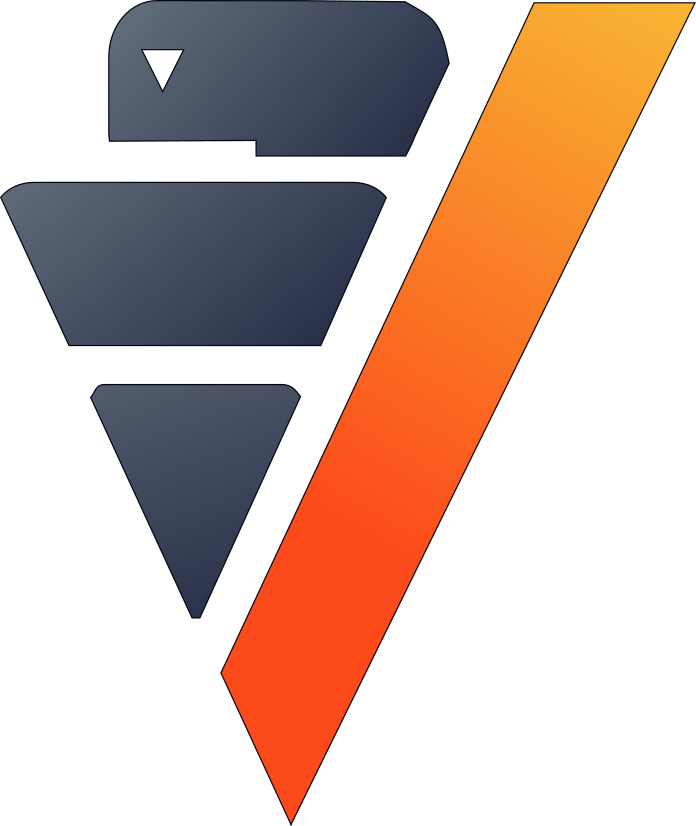

In [3]:
creditcard = vp.read_csv('data/creditcard.csv', 
                         parse_nrows = 1000)
display(creditcard)

<h2>Data Exploration</h2>

Let's explore the data by displaying descriptive statistics of all the columns.

count                     mean                   std                  min   \\
"Time"        284806         94813.8413657027      47488.2283297513                  0.0   \\
"V1"          284806     4.94593944284826e-06       1.9586974640224     -56.407509631329   \\
"V2"          284806     5.70457762978566e-06      1.65130867214891    -72.7157275629303   \\
"V3"          284806     -8.9455359328619e-06      1.51625015150494    -48.3255893623954   \\
"V4"          284806    -1.35415518936858e-06       1.4158708761878    -5.68317119816995   \\
"V5"          284806    -1.76537738534109e-06      1.38024883562916    -113.743306711146   \\
"V6"          284806    -1.78084282248157e-06      1.33227308968888    -26.1605059358433   \\
"V7"          284806     6.12498031875639e-06      1.23709145154523    -43.5572415712451   \\
"V8"          284806    -2.67056953047529e-06      1.19435414910998    -73.2167184552674   \\
"V9"          284806    -1.05394689850686e-05      1.09861961972555    -13.4340663182301   \\
"V10"         284806     4.08381472133854e-06      1.08884949581936    -24.5882624372475   \\
"V11"         284806    -1.38169915208807e-06      1.02071455331551    -4.79747346479757   \\
"V12"         284806     6.93843535334324e-06     0.999196282625864    -18.6837146333443   \\
"V13"         284806    -8.12075363651004e-07     0.995275883057862    -5.79188120632084   \\
"V14"         284806    -1.84962341608303e-06      0.95859678593258    -19.2143254902614   \\
"V15"         284806     1.13497169209891e-05      0.91529757725878    -4.49894467676621   \\
"V16"         284806    -7.66515009784341e-08     0.876254424770488    -14.1298545174931   \\
"V17"         284806    -1.82546167118454e-06     0.849337996047683    -25.1627993693248   \\
"V18"         284806    -3.95506512618923e-06     0.838175023391719    -9.49874592104677   \\
"V19"         284806    -2.80927640719469e-07      0.81404191608048    -7.21352743017759   \\
"V20"         284806    -7.33947797666482e-07     0.770926278808211     -54.497720494566   \\
"V21"         284806    -7.64172187575889e-07     0.734525190677675    -34.8303821448146   \\
"V22"         284806    -2.66232723466359e-06     0.725701443601768     -10.933143697655   \\
"V23"         284806    -9.87528822847108e-07     0.624461169497999    -44.8077352037913   \\
"V24"         284806    -2.58634991744588e-06     0.605646558279992    -2.83662691870341   \\
"V25"         284806     2.60318278485781e-06     0.521277134452016    -10.2953970749851   \\
"V26"         284806    -8.96574869783747e-07     0.482227622472413    -2.60455055280817   \\
"V27"         284806    -4.98388964024732e-07     0.403633115942523    -22.5656793207827   \\
"V28"         284806    -8.01132016653443e-07     0.330083566760313    -15.4300839055349   \\
"Amount"      284806         88.3497556582376      250.120537753744                  0.0   \\
"Class"       284806      0.00172749169610191    0.0415272624138428                  0.0   \\
                       approx_25%              approx_50%            approx_75%   \\
"Time"           53836.3519125683         84348.356547619       139145.62236534   \\
"V1"           -0.922687561939835    -0.00402352156353561      1.31589044482424   \\
"V2"           -0.595755755649292      0.0648887280140533     0.806345971979393   \\
"V3"           -0.889747862139421       0.179795003048091      1.02790240542886   \\
"V4"           -0.850673053289735     -0.0227690960995851     0.742162498479369   \\
"V5"           -0.692237575696747      -0.054146987315591     0.612683911437621   \\
"V6"           -0.767764777497726      -0.272073011134111     0.397409728991759   \\
"V7"           -0.553882847518934      0.0398145626467979     0.570420541346974   \\
"V8"           -0.208766182758203       0.022006162856551     0.328470871881628   \\
"V9"           -0.641658431375348     -0.0516690117329882      0.59598968061615   \\
"V10"          -0.535699872562504     -0.0929203715980967     0.45328255
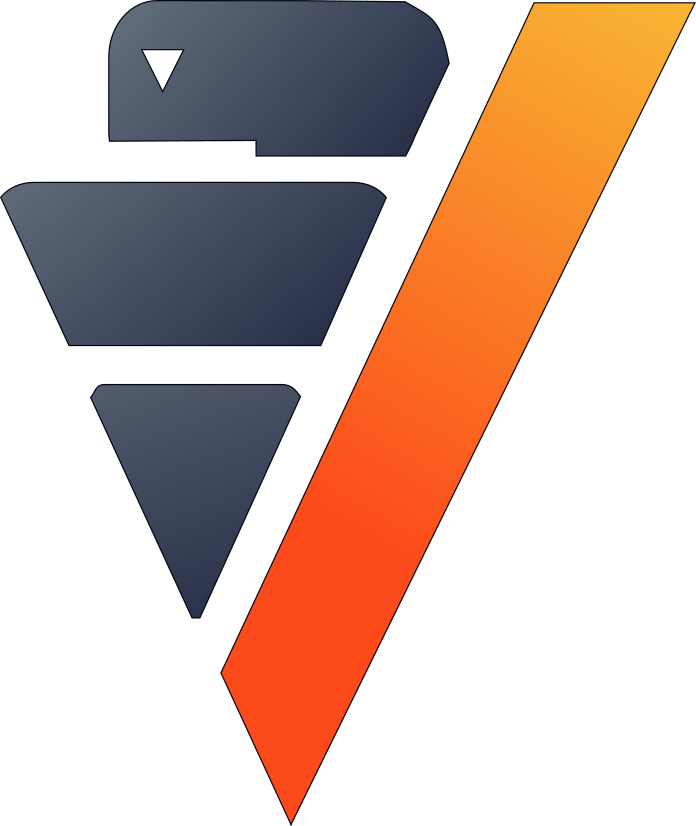

In [4]:
creditcard.describe()

It'll be difficult to work on the principal components (V1 through V28) without knowing what they mean. The only features we can work on are Time and Amount.

Let's convert the number of seconds elapsed to the correct date and time. We know that the records were ingested in September 2013, so we'll use that to create the new feature.

Time                    V1                     V2   \\
1      2013-09-01 00:00:00      -1.3598071336738    -0.0727811733098497   \\
2      2013-09-01 00:00:00      1.19185711131486       0.26615071205963   \\
3      2013-09-01 00:00:01     -1.35835406159823      -1.34016307473609   \\
4      2013-09-01 00:00:01    -0.966271711572087     -0.185226008082898   \\
5      2013-09-01 00:00:02     -1.15823309349523      0.877736754848451   \\
6      2013-09-01 00:00:02    -0.425965884412454      0.960523044882985   \\
7      2013-09-01 00:00:04      1.22965763450793      0.141003507049326   \\
8      2013-09-01 00:00:07     -0.89428608220282      0.286157196276544   \\
9      2013-09-01 00:00:07    -0.644269442348146       1.41796354547385   \\
10     2013-09-01 00:00:09     -0.33826175242575       1.11959337641566   \\
11     2013-09-01 00:00:10      0.38497821518095      0.616109459176472   \\
12     2013-09-01 00:00:10        1.249998742053      -1.22163680921816   \\
13     2013-09-01 00:00:10      1.44904378114715      -1.17633882535966   \\
14     2013-09-01 00:00:11       1.0693735878819      0.287722129331455   \\
15     2013-09-01 00:00:12      -2.7918547659339     -0.327770756658658   \\
16     2013-09-01 00:00:12    -0.752417042956605      0.345485415344747   \\
17     2013-09-01 00:00:12      1.10321543528383    -0.0402962145973447   \\
18     2013-09-01 00:00:13    -0.436905071360625      0.918966212909322   \\
19     2013-09-01 00:00:14     -5.40125766315825      -5.45014783420644   \\
20     2013-09-01 00:00:15       1.4929359769862      -1.02934573189487   \\
21     2013-09-01 00:00:16     0.694884775607337      -1.36181910308009   \\
22     2013-09-01 00:00:17     0.962496069914852       0.32846102605212   \\
23     2013-09-01 00:00:18     0.247491127783665      0.277665627353681   \\
24     2013-09-01 00:00:18      1.16661638244228      0.502120087854101   \\
25     2013-09-01 00:00:22      -2.0742946722629     -0.121481799450951   \\
26     2013-09-01 00:00:22     -1.94652513121534    -0.0449005054418194   \\
27     2013-09-01 00:00:23    -0.414288810090829      0.905437322625407   \\
28     2013-09-01 00:00:23      1.05938711501788     -0.175319186719244   \\
29     2013-09-01 00:00:23      1.17328461017079      0.353497876646456   \\
30     2013-09-01 00:00:23      1.32270726911234      -0.17404083293642   \\
31     2013-09-01 00:00:24      1.23742903021294     0.0610425841868962   \\
32     2013-09-01 00:00:25      1.11400859541157     0.0855460896870318   \\
33     2013-09-01 00:00:26     -0.53538776309446      0.865267807575272   \\
34     2013-09-01 00:00:26     -0.53538776309446      0.865267807575272   \\
35     2013-09-01 00:00:26    -0.529912284186556      0.873891581460326   \\
36     2013-09-01 00:00:26    -0.529912284186556      0.873891581460326   \\
37     2013-09-01 00:00:27     -1.45218727859439       1.76512373913739   \\
38     2013-09-01 00:00:27    -0.246045948703835       0.47326690335701   \\
39     2013-09-01 00:00:29     0.996369531566045      -0.12258878723806   \\
40     2013-09-01 00:00:29      1.11088034163339      0.168716770722767   \\
41     2013-09-01 00:00:32     -2.00887179458613       2.19852650316899   \\
42     2013-09-01 00:00:32      1.24905471963177     -0.624727077037783   \\
43     2013-09-01 00:00:33    -0.935731508971261      0.170415774156885   \\
44     2013-09-01 00:00:33    -0.607877142993026       1.03134507783793   \\
45     2013-09-01 00:00:34    -0.762255665726893      0.127767751953647   \\
46     2013-09-01 00:00:34    -0.291540244596543      0.445575313725742   \\
47     2013-09-01 00:00:34     0.201685891430752      0.497483215432781   \\
48     2013-09-01 00:00:34      1.13831556625444     0.0569559699973862   \\
49     2013-09-01 00:00:35     -1.06323567874519       1.41819062554828   \\
50     2013-09-01 00:00:35      1.19935593362078      0.129953154513887   \\
51     2013-09-01 00:00:35      1.38639697419213     -0.794209465382612   \\
52     2013-09-01 
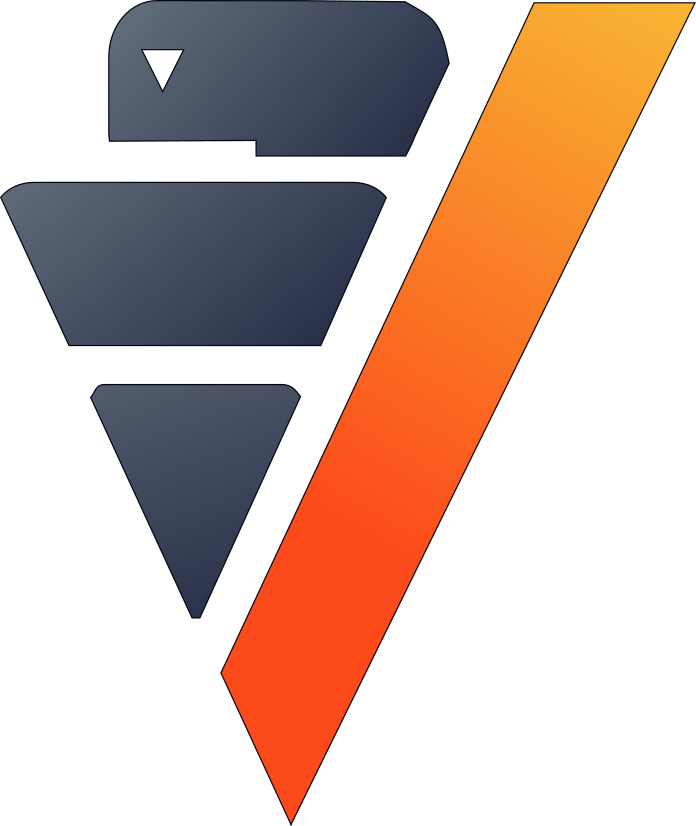

In [5]:
creditcard["Time"].apply("TIMESTAMPADD(second, {}::int, '2013-09-01 00:00:00'::timestamp)")

Let's take the data over two days and split them into a training set (first day) and test set (second day).

value  
name                    "Time"  
dtype                 datetime  
count                   284806  
min        2013-09-01 00:00:00  
max        2013-09-02 23:59:52  
Rows: 1-5 | Columns: 2
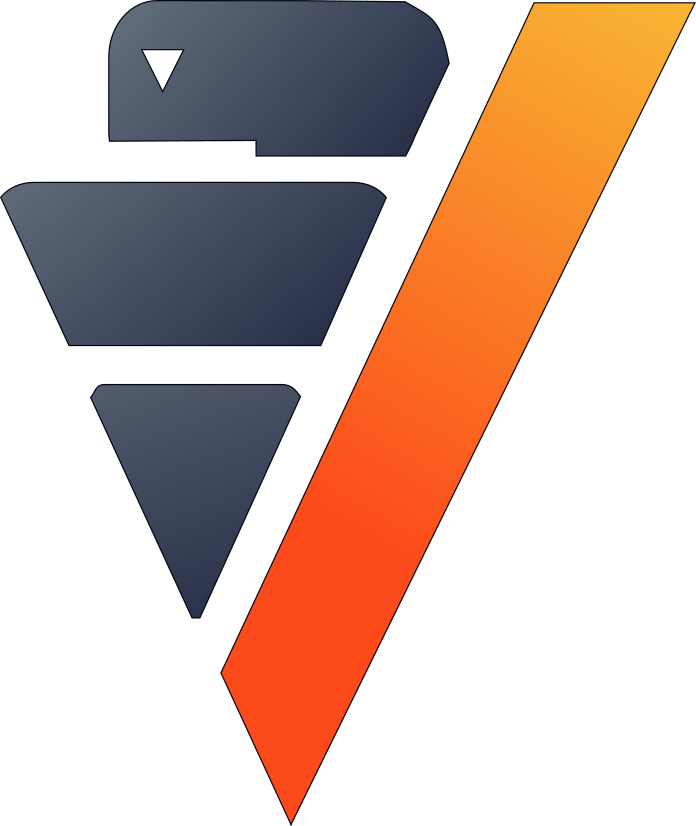

In [6]:
creditcard["Time"].describe()

Fraudulent activity probably isn't uniform across all hours of the day, so we'll extract the hour from the time and see how that influences the prediction.

Time    hour  
1      2013-09-01 00:00:00       0  
2      2013-09-01 00:00:00       0  
3      2013-09-01 00:00:01       0  
4      2013-09-01 00:00:01       0  
5      2013-09-01 00:00:02       0  
6      2013-09-01 00:00:02       0  
7      2013-09-01 00:00:04       0  
8      2013-09-01 00:00:07       0  
9      2013-09-01 00:00:07       0  
10     2013-09-01 00:00:09       0  
11     2013-09-01 00:00:10       0  
12     2013-09-01 00:00:10       0  
13     2013-09-01 00:00:10       0  
14     2013-09-01 00:00:11       0  
15     2013-09-01 00:00:12       0  
16     2013-09-01 00:00:12       0  
17     2013-09-01 00:00:12       0  
18     2013-09-01 00:00:13       0  
19     2013-09-01 00:00:14       0  
20     2013-09-01 00:00:15       0  
21     2013-09-01 00:00:16       0  
22     2013-09-01 00:00:17       0  
23     2013-09-01 00:00:18       0  
24     2013-09-01 00:00:18       0  
25     2013-09-01 00:00:22       0  
26     2013-09-01 00:00:22       0  
27     2013-09-01 00:00:23       0  
28     2013-09-01 00:00:23       0  
29     2013-09-01 00:00:23       0  
30     2013-09-01 00:00:23       0  
31     2013-09-01 00:00:24       0  
32     2013-09-01 00:00:25       0  
33     2013-09-01 00:00:26       0  
34     2013-09-01 00:00:26       0  
35     2013-09-01 00:00:26       0  
36     2013-09-01 00:00:26       0  
37     2013-09-01 00:00:27       0  
38     2013-09-01 00:00:27       0  
39     2013-09-01 00:00:29       0  
40     2013-09-01 00:00:29       0  
41     2013-09-01 00:00:32       0  
42     2013-09-01 00:00:32       0  
43     2013-09-01 00:00:33       0  
44     2013-09-01 00:00:33       0  
45     2013-09-01 00:00:34       0  
46     2013-09-01 00:00:34       0  
47     2013-09-01 00:00:34       0  
48     2013-09-01 00:00:34       0  
49     2013-09-01 00:00:35       0  
50     2013-09-01 00:00:35       0  
51     2013-09-01 00:00:35       0  
52     2013-09-01 00:00:36       0  
53     2013-09-01 00:00:36       0  
54     2013-09-01 00:00:36       0  
55     2013-09-01 00:00:37       0  
56     2013-09-01 00:00:38       0  
57     2013-09-01 00:00:39       0  
58     2013-09-01 00:00:39       0  
59     2013-09-01 00:00:40       0  
60     2013-09-01 00:00:41       0  
61     2013-09-01 00:00:41       0  
62     2013-09-01 00:00:41       0  
63     2013-09-01 00:00:41       0  
64     2013-09-01 00:00:42       0  
65     2013-09-01 00:00:42       0  
66     2013-09-01 00:00:44       0  
67     2013-09-01 00:00:44       0  
68     2013-09-01 00:00:44       0  
69     2013-09-01 00:00:44       0  
70     2013-09-01 00:00:46       0  
71     2013-09-01 00:00:46       0  
72     2013-09-01 00:00:46       0  
73     2013-09-01 00:00:47       0  
74     2013-09-01 00:00:48       0  
75     2013-09-01 00:00:48       0  
76     2013-09-01 00:00:49       0  
77     2013-09-01 00:00:49       0  
78     2013-09-01 00:00:49       0  
79     2013-09-01 00:00:50       0  
80     2013-09-01 00:00:50       0  
81     2013-09-01 00:00:51       0  
82     2013-09-01 00:00:52       0  
83     2013-09-01 00:00:52       0  
84     2013-09-01 00:00:53       0  
85     2013-09-01 00:00:54       0  
86     2013-09-01 00:00:55       0  
87     2013-09-01 00:00:55       0  
88     2013-09-01 00:00:56       0  
89     2013-09-01 00:00:56       0  
90     2013-09-01 00:00:59       0  
91     2013-09-01 00:00:59       0  
92     2013-09-01 00:01:00       0  
93     2013-09-01 00:01:00       0  
94     2013-09-01 00:01:02       0  
95     2013-09-01 00:01:04       0  
96     2013-09-01 00:01:04       0  
97     2013-09-01 00:01:04       0  
98     2013-09-01 00:01:07       0  
99     2013-09-01 00:01:07       0  
100    2013-09-01 00:01:08       0  
Rows: 1-100 | Columns: 2
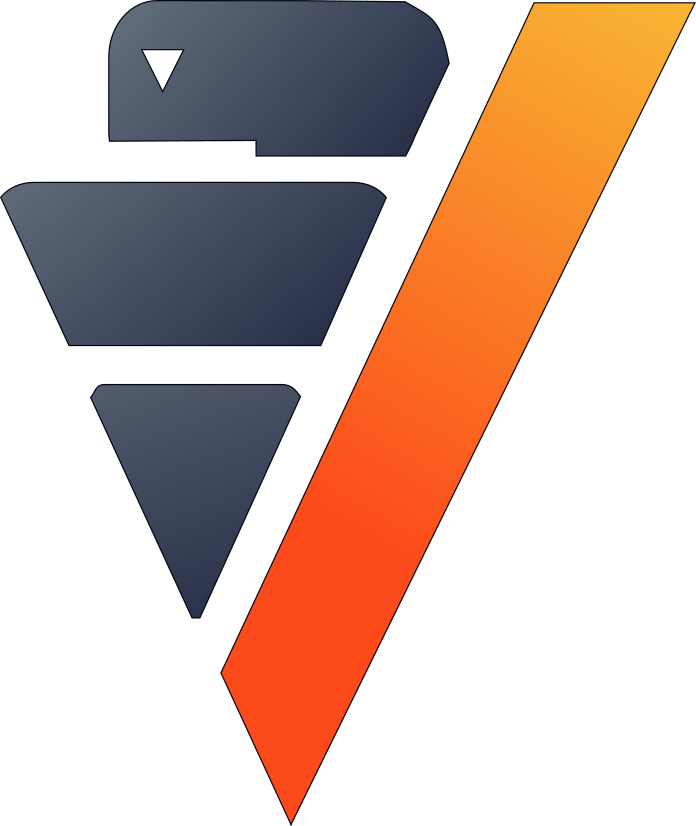

In [7]:
import verticapy.stats as st
creditcard["hour"] = st.hour(creditcard["Time"])
creditcard[["Time", "hour"]]

We can visualize the frequency of fraudulent transactions throughout the day with a histogram.

<AxesSubplot:xlabel='"hour"', ylabel='avg'>

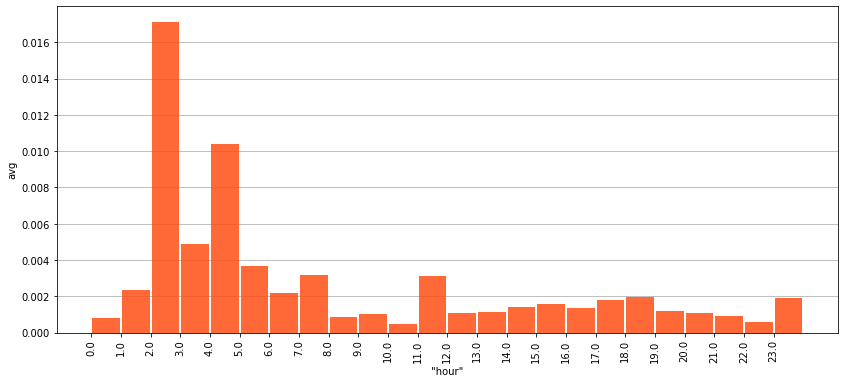

In [8]:
creditcard["hour"].hist(method="avg", of="Class")

It seems like most fraudulent activity happens at night.

The transaction amount also likely differs between fraudulent and genuine transactions, so we'll look at that relationship with a bar chart. Notice that fraudulent transactions tend to be larger purchases.

<AxesSubplot:xlabel='AVG("Amount")', ylabel='"Class"'>

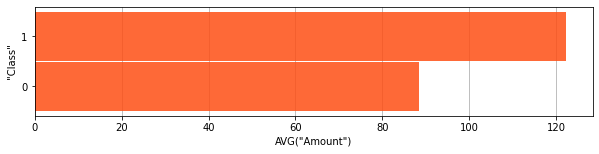

In [9]:
creditcard["Class"].bar(method = "avg", 
                        of = "Amount")

Let's create some new features and move forward from there.

<h2>Features Engineering</h2>

Since all data (besides Time and Amount) are encoded, we're somewhat limited in creating features.

One way to work with this limitation for time series is with moving windows.

In lieu of customer IDs, we'll aggregate on the transaction amount over some partitions. Let's compute some features to analyze the transaction amount and frequencies across different windows: 5 hours preceding, 5 minutes preceding, and 5 seconds preceding. Choosing these windows is pretty subjective, but we can close in on the most relevant windows after some more extensive testing.

Time                    V1                      V2   \\
1      2013-09-01 00:04:42    -0.356466189895633       0.725417515222339   \\
2      2013-09-01 00:06:20     -1.29983679037626         0.8818174638094   \\
3      2013-09-01 00:06:43      1.23741280400293       0.512364829919811   \\
4      2013-09-01 00:06:46      -2.3122265423263        1.95199201064158   \\
5      2013-09-01 00:07:10     -1.86025769215298      -0.629858920058775   \\
6      2013-09-01 00:11:51    -0.431349344181742         1.0276943686964   \\
7      2013-09-01 00:13:24      1.18169674230131    -0.00790838253075205   \\
8      2013-09-01 00:13:40    -0.937481308513789       0.401648800443462   \\
9      2013-09-01 00:15:12      1.08300282220975       0.201588805942263   \\
10     2013-09-01 00:19:53      1.13064571363923       0.625390808632439   \\
11     2013-09-01 00:24:03      1.07669964934738       0.136318699223954   \\
12     2013-09-01 00:24:04    -0.960402765914102        1.35531588640372   \\
13     2013-09-01 00:24:04      1.04095773197955        0.21609187923736   \\
14     2013-09-01 00:27:26      1.28612164488794     -0.0170223846680513   \\
15     2013-09-01 00:30:39     -3.76635495687565     0.00115241009315931   \\
16     2013-09-01 00:30:40     -4.10236268074792       0.809807178087404   \\
17     2013-09-01 00:31:28      -1.9271413969678        1.36822007454421   \\
18     2013-09-01 00:38:11      1.22554940542373       0.229187163313896   \\
19     2013-09-01 00:39:31    -0.878833411257206       0.133657031032529   \\
20     2013-09-01 00:41:09      1.21725936914487       0.190829936119976   \\
21     2013-09-01 00:41:59    -0.707495366659854        1.63448375917091   \\
22     2013-09-01 00:42:29    -0.971649645618621        1.01160240688124   \\
23     2013-09-01 00:45:41      1.33214151055631      -0.439845679128354   \\
24     2013-09-01 00:46:52    -0.633402988273647       0.963616038629393   \\
25     2013-09-01 00:47:07      -0.7065981589733       0.974523160216677   \\
26     2013-09-01 00:47:08      1.18169674230131    -0.00790838253075205   \\
27     2013-09-01 00:47:50    -0.460602378703135       0.399328081326802   \\
28     2013-09-01 00:48:11     -1.35641040971786       0.434827663677634   \\
29     2013-09-01 00:49:49    -0.469172787241511       0.745574362205744   \\
30     2013-09-01 00:50:03     -0.94424502664269       0.824886752111318   \\
31     2013-09-01 00:50:46      1.14151696217157       0.147295613099947   \\
32     2013-09-01 00:51:45     -1.04345576732149       0.965423498294581   \\
33     2013-09-01 00:52:16       1.2161984121875      0.0860135203509317   \\
34     2013-09-01 00:52:30      1.31328086769114      -0.257922822433797   \\
35     2013-09-01 00:53:06      1.12683745763192       0.319626651414043   \\
36     2013-09-01 00:53:24      1.08259864813075       0.161658742792151   \\
37     2013-09-01 00:53:44     -1.36214556882137     -0.0143672146223221   \\
38     2013-09-01 00:54:12    -0.734151857152384        1.09726690156465   \\
39     2013-09-01 00:54:35      1.06316179036014       0.135568532115511   \\
40     2013-09-01 00:55:30    -0.377907875150086       0.987532974913681   \\
41     2013-09-01 00:55:41      -0.2867405195164        1.17635465654495   \\
42     2013-09-01 00:56:11     -1.23676610337945         1.1511574400735   \\
43     2013-09-01 01:00:53       1.2014393023731      -0.062348114663166   \\
44     2013-09-01 01:03:03       1.1062615923626       0.398131419117759   \\
45     2013-09-01 01:05:42    -0.598992807225779       0.234645997304788   \\
46     2013-09-01 01:07:59      1.18934994142134       0.467737082845855   \\
47     2013-09-01 01:09:45    -0.843893204447029        1.09747848531684   \\
48     2013-09-01 01:14:56     -2.84329430818721       -1.77952413401389   \\
49     2013-09-01 01:15:37      1.11975115790003       0.325088928432079   \\
50     2013-09-01 01:17:08    -0.839150175679216     -0.0583047420103231   \\
51     2013-09-01 01:18:16      -1.287907364
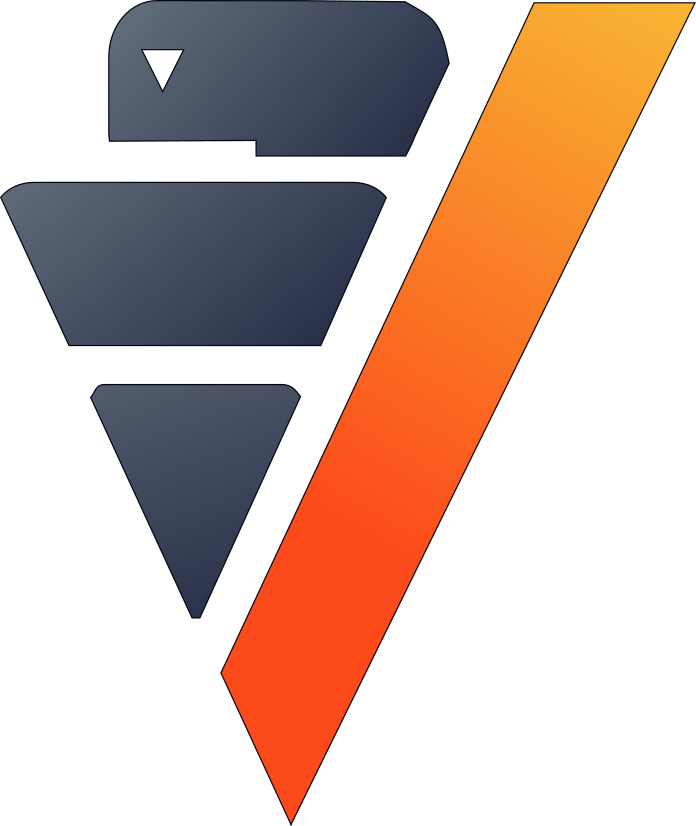

In [10]:
creditcard.rolling(name="nb_same_transactions_mn_5h", 
                   func="COUNT", 
                   columns="Amount",
                   window=("- 5 hours", "0 hour"),
                   by=["Amount"],
                   order_by=["Time"],)
creditcard.rolling(name="nb_same_transactions_mn_5m", 
                   func="COUNT", 
                   columns="Amount",
                   window=("- 5 minutes", "0 minute"),
                   by=["Amount"],
                   order_by=["Time"],)
creditcard.rolling(name="nb_same_transactions_mn_5s", 
                   func="COUNT", 
                   columns="Amount",
                   window=("- 5 seconds", "0 second"),
                   by = ["Amount"],
                   order_by = ["Time"],)

As an aside, we could also create some features that represent different parts of the day, but won't be useful for our use case since we're only working with data for two days' worth of data.

Let's look at the correlation matrix and see which features influence our prediction.

"V1"                     "V2"                     "V3"   \\
"V1"                                                1.0    -2.48444192942183e-06     4.24296182351879e-06   \\
"V2"                              -2.48444192942183e-06                      1.0     5.80474202796654e-06   \\
"V3"                               4.24296182351879e-06     5.80474202796654e-06                      1.0   \\
"V4"                               6.87825715222241e-07      9.4100559922698e-07    -1.60706144246859e-06   \\
"V5"                               9.19843170418736e-07      1.2584257256026e-06    -2.14915560995973e-06   \\
"V6"                               9.61315517136252e-07     1.31516351413525e-06    -2.24605313146269e-06   \\
"V7"                              -3.56070922100461e-06    -4.87136093092507e-06     8.31937273539253e-06   \\
"V8"                               1.60806790647091e-06     2.19997722070319e-06    -3.75714934136276e-06   \\
"V9"                               6.89929948071414e-06     9.43884373879601e-06    -1.61197785144215e-05   \\
"V10"                             -2.69731578057294e-06    -3.69016336244496e-06     6.30210836429911e-06   \\
"V11"                              9.73515347230113e-07     1.33185394616816e-06     -2.2745572677627e-06   \\
"V12"                             -4.99395188999346e-06    -6.83216196984572e-06     1.16680539227091e-05   \\
"V13"                              5.86795091619122e-07      8.0278689047611e-07    -1.37100975707797e-06   \\
"V14"                              1.38765327307279e-06     1.89843076675341e-06    -3.24216443529464e-06   \\
"V15"                             -8.91777137708676e-06    -1.22002894290408e-05     2.08358109147335e-05   \\
"V16"                              6.29106337671093e-08     8.60672381199213e-08    -1.46986732639043e-07   \\
"V17"                              1.54570204970557e-06     2.11465528455406e-06    -3.61143544403125e-06   \\
"V18"                              3.39353663199689e-06     4.64265424121466e-06    -7.92878451464591e-06   \\
"V19"                              2.48188310839069e-07     3.39543264938587e-07    -5.79876349617743e-07   \\
"V20"                              6.84677317443555e-07     9.36698315984261e-07    -1.59970540755538e-06   \\
"V21"                              7.48200768593993e-07     1.02360394086788e-06    -1.74812395184857e-06   \\
"V22"                              2.63837829506253e-06     3.60953173896088e-06    -6.16440464307054e-06   \\
"V23"                              1.13730764875215e-06     1.55593610730875e-06    -2.65724766328053e-06   \\
"V24"                              3.07115436982447e-06     4.20160717435644e-06    -7.17555867258572e-06   \\
"V25"                             -3.59144819139119e-06     -4.9134145240299e-06     8.39119240319819e-06   \\
"V26"                              1.33711295484153e-06     1.82928720208352e-06    -3.12408016770587e-06   \\
"V27"                              8.88004657509551e-07     1.21486786077321e-06    -2.07476692871922e-06   \\
"V28"                              1.74547568068598e-06     2.38796304744298e-06    -4.07819394535443e-06   \\
"Amount"                             -0.227709261538788       -0.531410401528114       -0.210880613110927   \\
"Class"                              -0.101347495968755       0.0912886620563458       -0.192961538675933   \\
"hour"                             -0.00521902242760289      0.00779572197556831      -0.0215578163868944   \\
"nb_same_transactions_mn_5h"         0.0611926862372699       0.0976283211908861      -0.0512265213063261   \\
"nb_same_transactions_mn_5m"         0.0426958865142418       0.0274179718362602       0.0206011139790986   \\
"nb_same_transactions_mn_5s"         0.0472934003641123       0.0116527988935146       0.0280807335045743   \\
                                                   "V4"                     "V5"                     "V6"   \\
"V1"                               6.87825715222241e-07
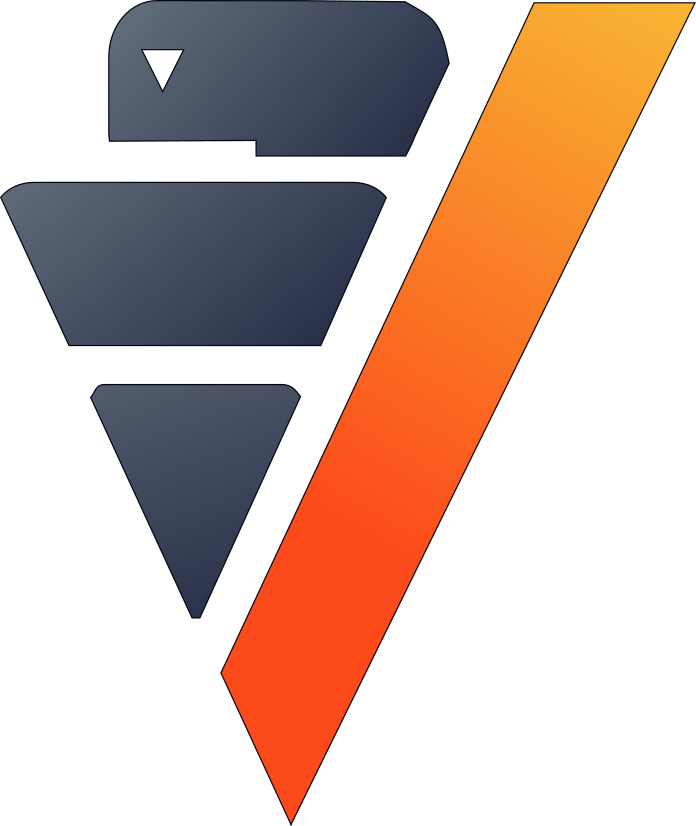

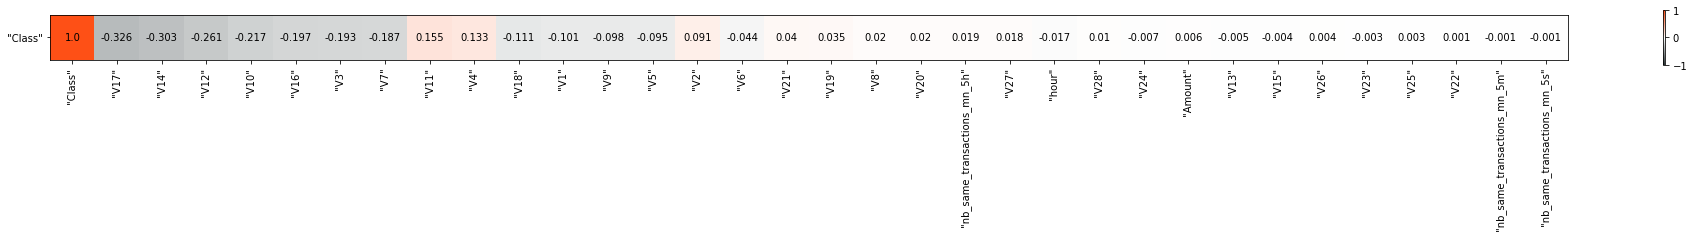

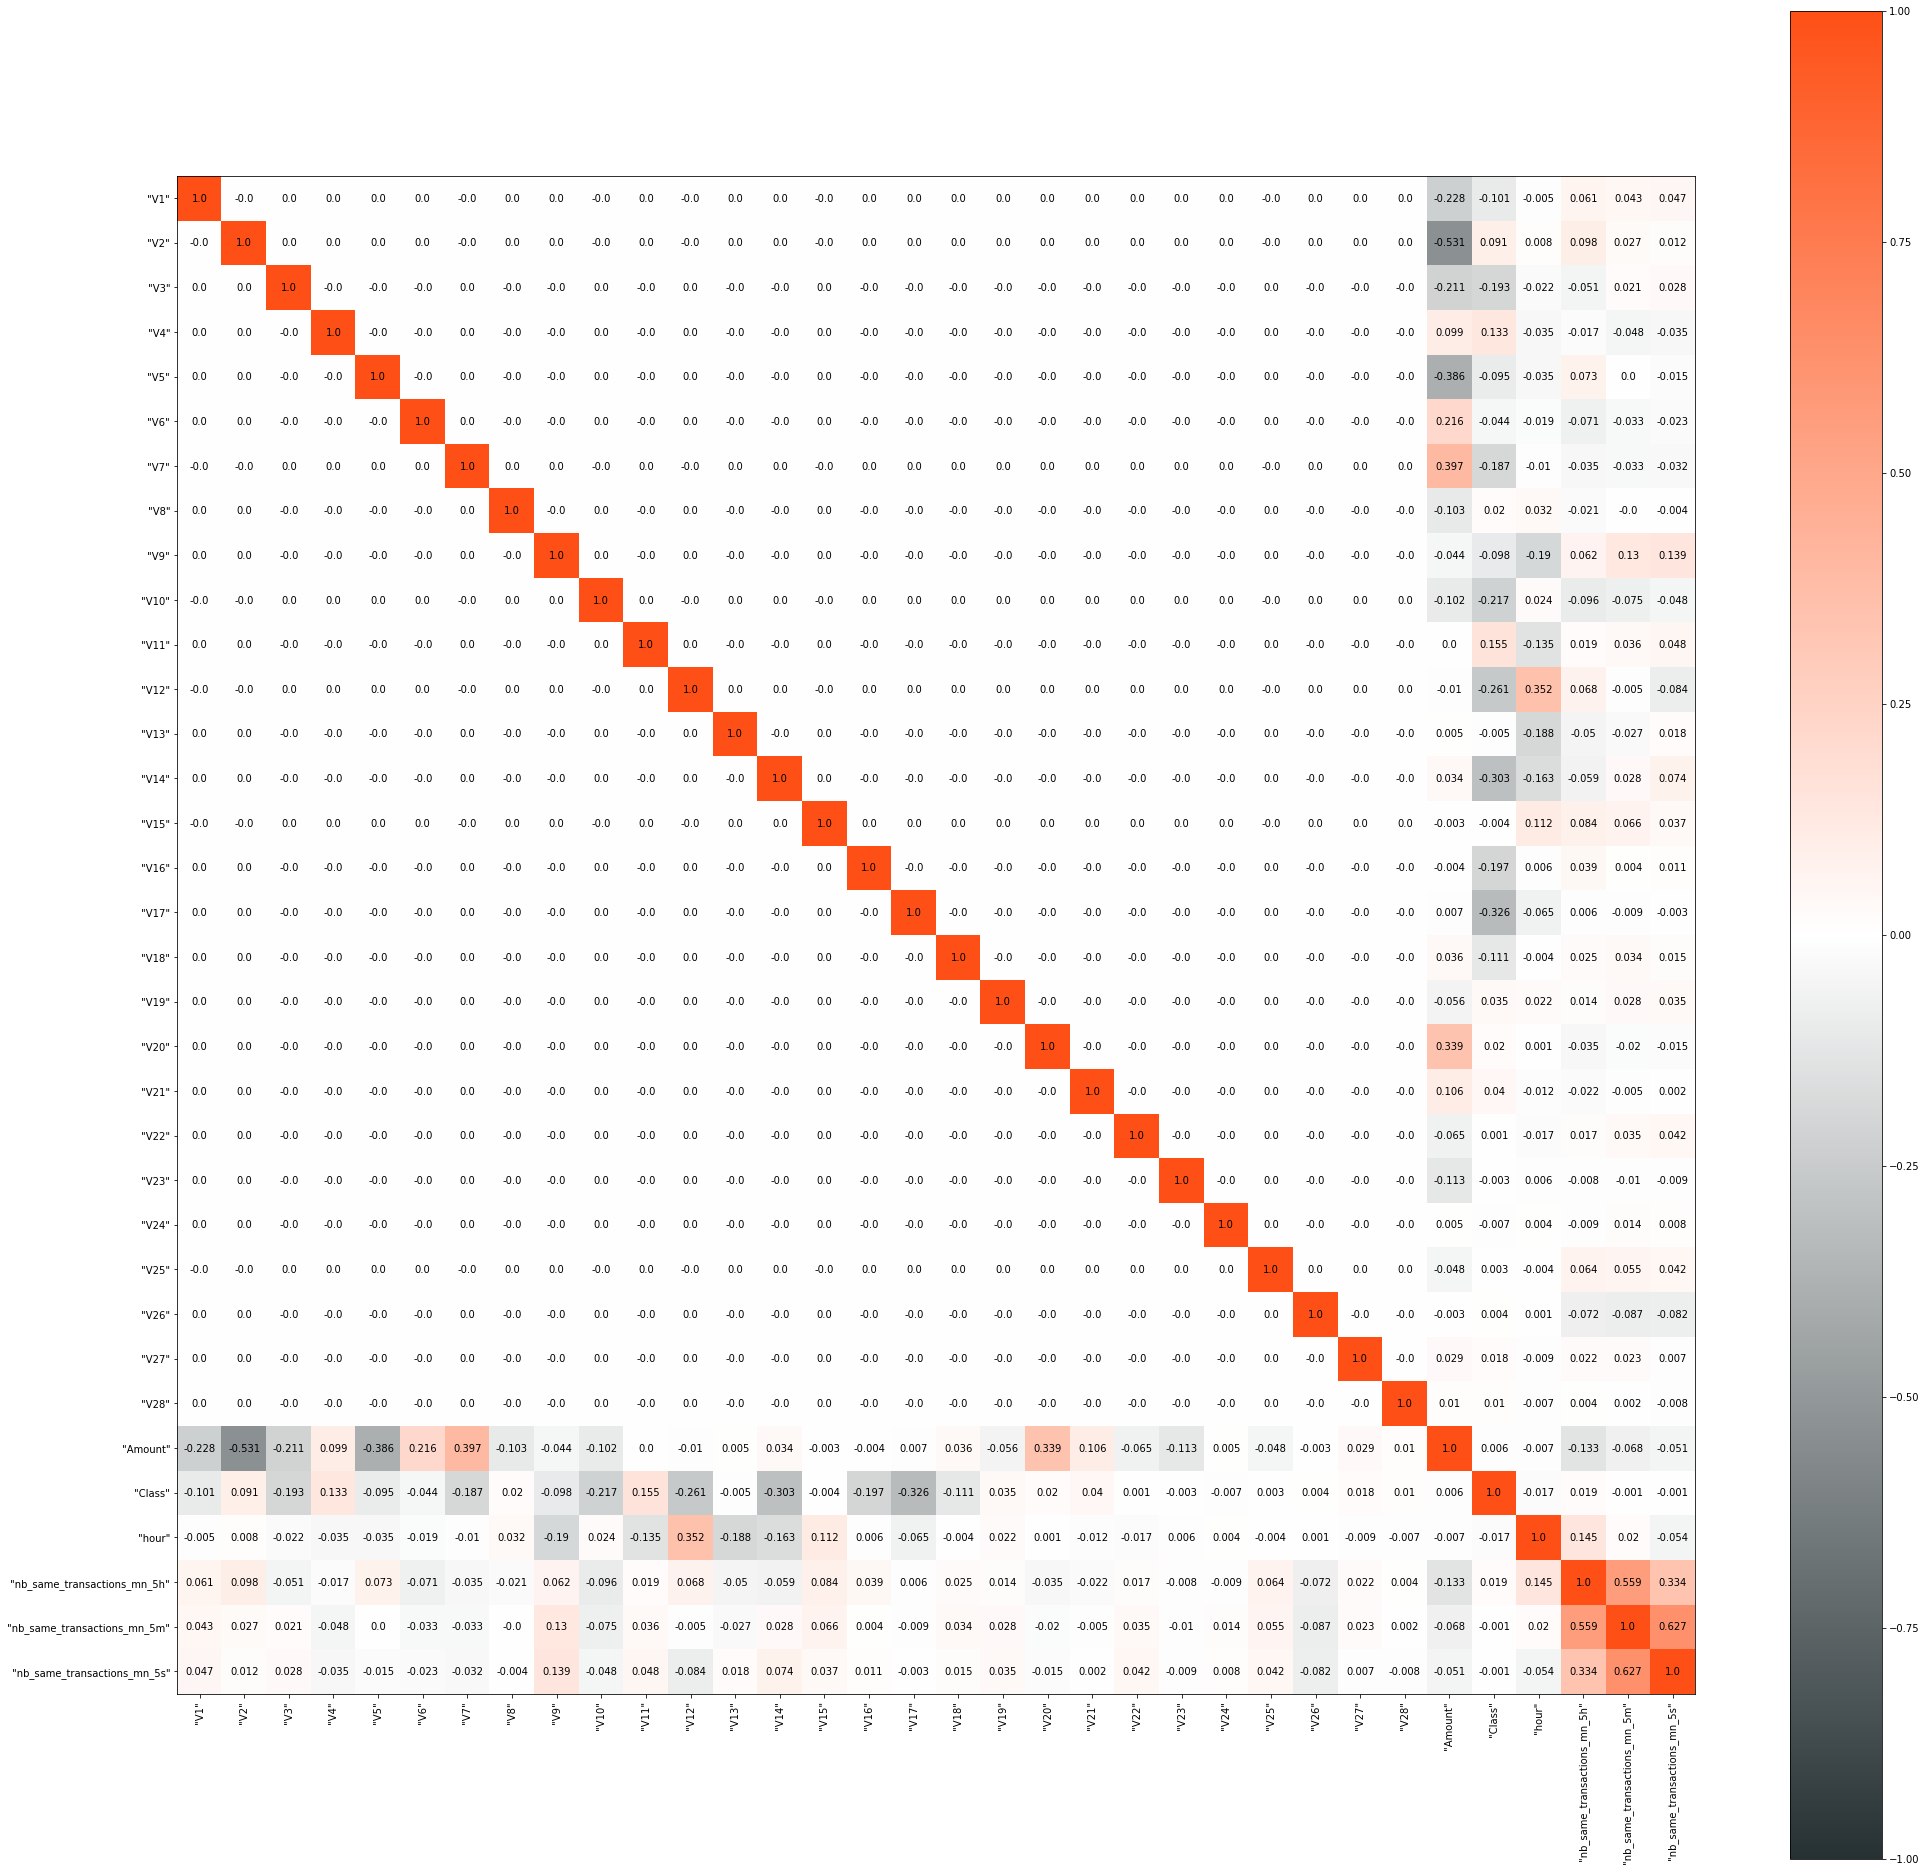

In [11]:
creditcard.corr(focus="Class")
creditcard.corr()

Our new features aren't linearly correlated with our response, but some of the components seem to have a large influence on our prediction. We'll use these when we create our model.

To simplify things, let's save the dataset into a new table. 

Time                    V1                      V2   \\
1      2013-09-01 00:04:42    -0.356466189895633       0.725417515222339   \\
2      2013-09-01 00:06:20     -1.29983679037626         0.8818174638094   \\
3      2013-09-01 00:06:43      1.23741280400293       0.512364829919811   \\
4      2013-09-01 00:06:46      -2.3122265423263        1.95199201064158   \\
5      2013-09-01 00:07:10     -1.86025769215298      -0.629858920058775   \\
6      2013-09-01 00:11:51    -0.431349344181742         1.0276943686964   \\
7      2013-09-01 00:13:24      1.18169674230131    -0.00790838253075205   \\
8      2013-09-01 00:13:40    -0.937481308513789       0.401648800443462   \\
9      2013-09-01 00:15:12      1.08300282220975       0.201588805942263   \\
10     2013-09-01 00:19:53      1.13064571363923       0.625390808632439   \\
11     2013-09-01 00:24:03      1.07669964934738       0.136318699223954   \\
12     2013-09-01 00:24:04    -0.960402765914102        1.35531588640372   \\
13     2013-09-01 00:24:04      1.04095773197955        0.21609187923736   \\
14     2013-09-01 00:27:26      1.28612164488794     -0.0170223846680513   \\
15     2013-09-01 00:30:39     -3.76635495687565     0.00115241009315931   \\
16     2013-09-01 00:30:40     -4.10236268074792       0.809807178087404   \\
17     2013-09-01 00:31:28      -1.9271413969678        1.36822007454421   \\
18     2013-09-01 00:38:11      1.22554940542373       0.229187163313896   \\
19     2013-09-01 00:39:31    -0.878833411257206       0.133657031032529   \\
20     2013-09-01 00:41:09      1.21725936914487       0.190829936119976   \\
21     2013-09-01 00:41:59    -0.707495366659854        1.63448375917091   \\
22     2013-09-01 00:42:29    -0.971649645618621        1.01160240688124   \\
23     2013-09-01 00:45:41      1.33214151055631      -0.439845679128354   \\
24     2013-09-01 00:46:52    -0.633402988273647       0.963616038629393   \\
25     2013-09-01 00:47:07      -0.7065981589733       0.974523160216677   \\
26     2013-09-01 00:47:08      1.18169674230131    -0.00790838253075205   \\
27     2013-09-01 00:47:50    -0.460602378703135       0.399328081326802   \\
28     2013-09-01 00:48:11     -1.35641040971786       0.434827663677634   \\
29     2013-09-01 00:49:49    -0.469172787241511       0.745574362205744   \\
30     2013-09-01 00:50:03     -0.94424502664269       0.824886752111318   \\
31     2013-09-01 00:50:46      1.14151696217157       0.147295613099947   \\
32     2013-09-01 00:51:45     -1.04345576732149       0.965423498294581   \\
33     2013-09-01 00:52:16       1.2161984121875      0.0860135203509317   \\
34     2013-09-01 00:52:30      1.31328086769114      -0.257922822433797   \\
35     2013-09-01 00:53:06      1.12683745763192       0.319626651414043   \\
36     2013-09-01 00:53:24      1.08259864813075       0.161658742792151   \\
37     2013-09-01 00:53:44     -1.36214556882137     -0.0143672146223221   \\
38     2013-09-01 00:54:12    -0.734151857152384        1.09726690156465   \\
39     2013-09-01 00:54:35      1.06316179036014       0.135568532115511   \\
40     2013-09-01 00:55:30    -0.377907875150086       0.987532974913681   \\
41     2013-09-01 00:55:41      -0.2867405195164        1.17635465654495   \\
42     2013-09-01 00:56:11     -1.23676610337945         1.1511574400735   \\
43     2013-09-01 01:00:53       1.2014393023731      -0.062348114663166   \\
44     2013-09-01 01:03:03       1.1062615923626       0.398131419117759   \\
45     2013-09-01 01:05:42    -0.598992807225779       0.234645997304788   \\
46     2013-09-01 01:07:59      1.18934994142134       0.467737082845855   \\
47     2013-09-01 01:09:45    -0.843893204447029        1.09747848531684   \\
48     2013-09-01 01:14:56     -2.84329430818721       -1.77952413401389   \\
49     2013-09-01 01:15:37      1.11975115790003       0.325088928432079   \\
50     2013-09-01 01:17:08    -0.839150175679216     -0.0583047420103231   \\
51     2013-09-01 01:18:16      -1.287907364
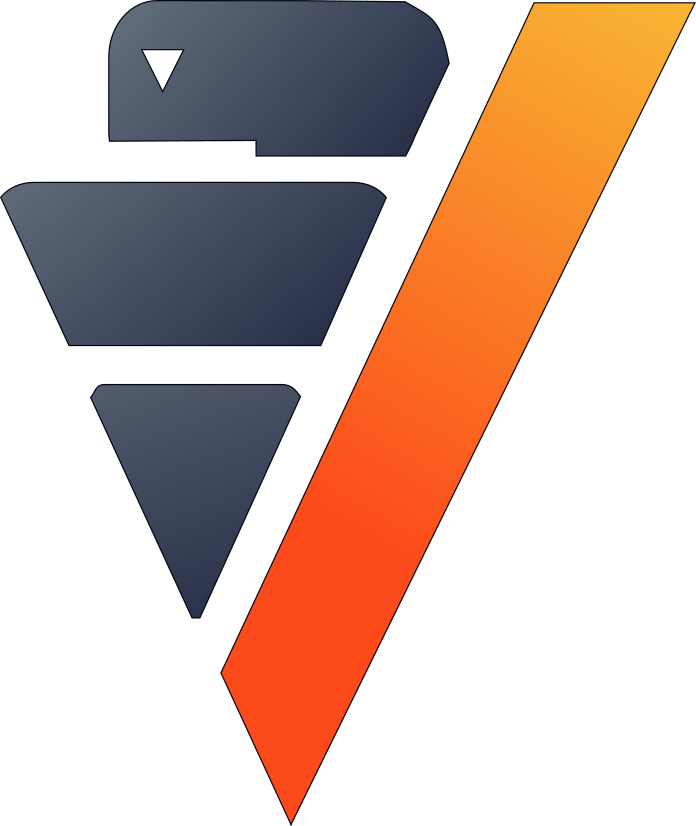

In [12]:
vp.drop("creditcard_clean", relation_type="table")
creditcard.to_db("creditcard_clean", 
                 relation_type="table",
                 inplace=True,)

<h2>Data Modeling</h2>

<b>Train/Test sets</b>

Since we're dealing with time series data, we have to maintain time linearity. Our goal is to use the past to predict the future, so a k-fold cross-validation, for example, wouldn't make much sense here.

We will split the dataset into a train (day 1) and a test (day 2).

In [13]:
train = creditcard.search("Time  < '2013-09-02 00:00:00'")
test  = creditcard.search("Time >= '2013-09-02 00:00:00'")

<h3>Supervision</h3>

Supervising would make this pretty easy since it would just be a binary classification problem. We can use different algorithms to optimize the prediction. Our dataset is unbalanced, so the AUC might be a good metric to evaluate the model. The PRC AUC would also be a relevant metric.

<b>Logistic Regression</b>

Logistic regression works well with monotonic relationships. Since we have a lot of independent features that correlate with the response, it should be a good first model to use.

value  
auc                0.9534713388092546  
prc_auc            0.6414466848625406  
accuracy           0.9990001428367377  
log_loss          0.00205422248377388  
precision          0.7204968944099379  
recall             0.5497630331753555  
f1_score           0.6236559139784947  
mcc                0.6288858739383378  
informedness       0.5494411654844342  
markedness         0.7198176388740052  
csi                          0.453125  
cutoff                            0.5  
Rows: 1-12 | Columns: 2
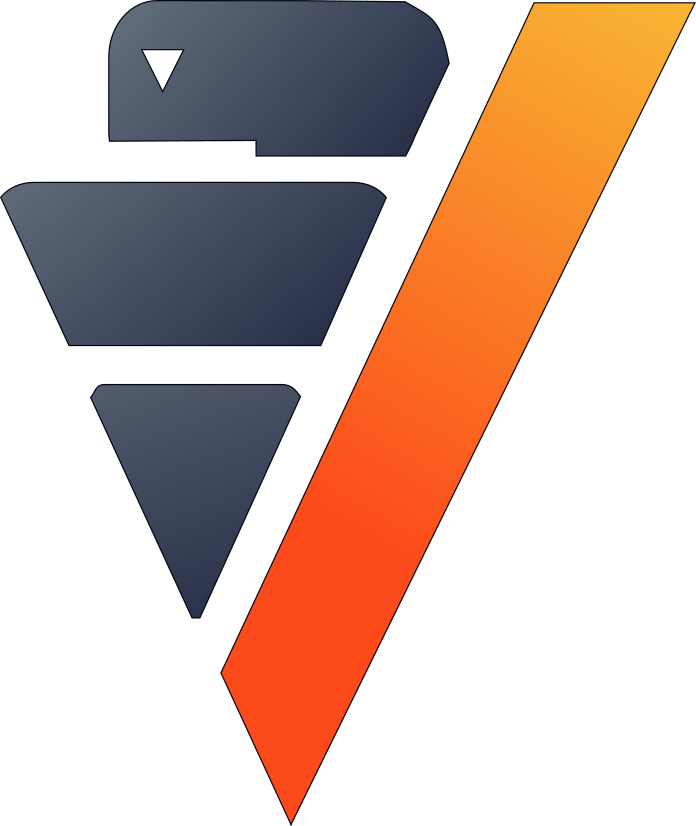

In [14]:
from verticapy.learn.linear_model import LogisticRegression

predictors = creditcard.get_columns(exclude_columns=["Class", "Time"])
response = 'Class'
model = LogisticRegression("fraud_model", 
                           penalty = 'L2', 
                           tol = 1e-6, 
                           max_iter = 1000, 
                           solver = "BFGS")
model.fit(train, predictors, response, test)
model.classification_report()

Based on the report, our model is very good at detecting non-fraudulent events; the AUC is high and the PRC AUC is decent. We can use this model to filter obvious events and to get some insight on the importance of each feature.

importance    sign  
nb_same_transactions_mn_5s           10.35      -1  
v14                                   8.26      -1  
v27                                   7.86      -1  
v10                                   6.96      -1  
v20                                   6.44      -1  
nb_same_transactions_mn_5m            6.13      -1  
v21                                   5.76       1  
v5                                    4.66      -1  
amount                                4.26       1  
v4                                    4.21       1  
v9                                    4.18      -1  
v28                                   3.42      -1  
v6                                    3.38      -1  
v12                                   3.34       1  
v3                                    3.27       1  
v7                                    2.67      -1  
v22                                   2.56       1  
v8                                    2.19      -1  
v13                                   1.92      -1  
v16                                   1.46       1  
v26                                   1.07       1  
v11                                   0.85      -1  
nb_same_transactions_mn_5h            0.85       1  
v23                                   0.73      -1  
v24                                   0.73      -1  
v15                                   0.66       1  
v25                                   0.57      -1  
v2                                    0.49       1  
v17                                   0.25      -1  
v19                                   0.24       1  
hour                                  0.11      -1  
v18                                    0.1      -1  
v1                                    0.06       1  
Rows: 1-33 | Columns: 3
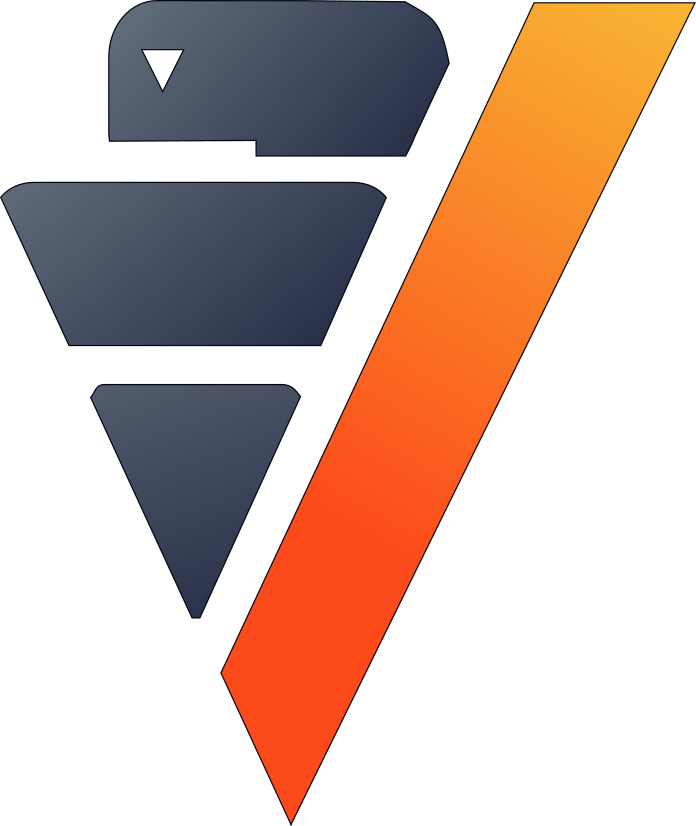

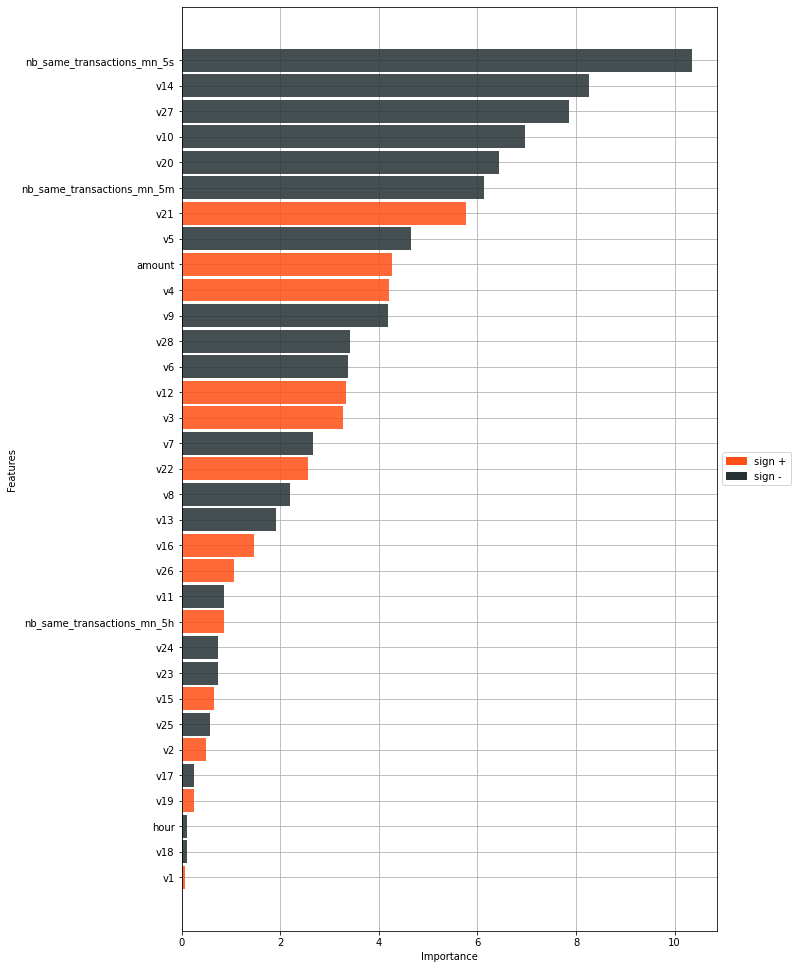

In [15]:
model.features_importance()

Some PCA components seem to be very relevant and will be essential for finding anomalies. Notice that one of our new features, nb_same_transactions_mn_5s, is the most important one. It seems that repetitive transactions of the same amount are unlikely to be fraud. Generally speaking, fraudulent events seem to be large, nonrepetitive transactions.

<b>AutoML</b>

AutoML is a powerful function in VerticaPy that tests many different models, compares their performance, and settles on the most well-performing model.

We can expect many collective and contextual outliers, so a tree-based models will probably work well. AutoML can help find suitable algorithms for the dataset.

Starting AutoML




Testing Model - LogisticRegression



Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'none', 'solver': 'bfgs'}; Test_score: 0.68349151048877; Train_score: 0.6714592668018413; Time: 30.67182230949402;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'l1', 'solver': 'cgd', 'C': 1.0}; Test_score: 0.500880041328; Train_score: 0.5008555851569509; Time: 1.8258856932322185;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'l2', 'solver': 'bfgs', 'C': 1.0}; Test_score: 0.6868969140778011; Train_score: 0.713449210327742; Time: 30.38058606783549;

Grid Search Selected Model
LogisticRegression; Parameters: {'solver': 'bfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 1.0, 'tol': 1e-06}; Test_score: 0.6868969140778011; Train_score: 0.713449210327742; Time: 30.38058606783549;

Testing Model - NaiveBayes



Model: NaiveBayes; Parameters: {'alpha': 0.01}; Test_score: 0.4289489751555001; Train_score: 0.4292646712826215; Time: 1.051988999048869;
Model: NaiveBayes; Parameters: {'alpha': 1.0}; Test_score: 0.42869693348870896; Train_score: 0.4304368841688505; Time: 1.0004164377848308;
Model: NaiveBayes; Parameters: {'alpha': 10.0}; Test_score: 0.438844889453718; Train_score: 0.42504630650758835; Time: 1.0843093395233154;

Grid Search Selected Model
NaiveBayes; Parameters: {'alpha': 10.0, 'nbtype': 'auto'}; Test_score: 0.438844889453718; Train_score: 0.42504630650758835; Time: 1.0843093395233154;

Testing Model - LinearSVC



Model: LinearSVC; Parameters: {'tol': 1e-06, 'fit_intercept': True, 'intercept_mode': 'unregularized', 'max_iter': 100}; Test_score: 0.7380361270228938; Train_score: 0.7792798207101952; Time: 32.016225258509316;
Model: LinearSVC; Parameters: {'tol': 1e-06, 'fit_intercept': True, 'intercept_mode': 'regularized', 'max_iter': 100}; Test_score: 0.7319196076911149; Train_score: 0.7781129275480732; Time: 37.25153398513794;
Model: LinearSVC; Parameters: {'tol': 1e-06, 'C': 1.0, 'fit_intercept': True, 'intercept_mode': 'regularized', 'max_iter': 100}; Test_score: 0.7738477419894275; Train_score: 0.7586906685904172; Time: 31.643476565678913;

Grid Search Selected Model
LinearSVC; Parameters: {'tol': 1e-06, 'C': 1.0, 'max_iter': 100, 'fit_intercept': True, 'intercept_scaling': 1.0, 'intercept_mode': 'regularized', 'class_weight': [1, 1]}; Test_score: 0.7738477419894275; Train_score: 0.7586906685904172; Time: 31.643476565678913;

Testing Model - RandomForestClassifier



Model: RandomForestClassifier; Parameters: {'max_features': 'max', 'max_leaf_nodes': 1000, 'max_depth': 5, 'min_samples_leaf': 1, 'min_info_gain': 0.0, 'nbins': 32}; Test_score: 0.8451952459888945; Train_score: 0.856277396984151; Time: 11.70705803235372;
Model: RandomForestClassifier; Parameters: {'max_features': 'max', 'max_leaf_nodes': 64, 'max_depth': 5, 'min_samples_leaf': 1, 'min_info_gain': 0.0, 'nbins': 32}; Test_score: 0.8054457876917553; Train_score: 0.8559976287559075; Time: 10.56883692741394;
Model: RandomForestClassifier; Parameters: {'max_features': 'max', 'max_leaf_nodes': 32, 'max_depth': 4, 'min_samples_leaf': 2, 'min_info_gain': 0.0, 'nbins': 32}; Test_score: 0.822903124120293; Train_score: 0.8473299727249203; Time: 8.73043696085612;

Grid Search Selected Model
RandomForestClassifier; Parameters: {'n_estimators': 10, 'max_features': 'max', 'max_leaf_nodes': 1000, 'sample': 0.632, 'max_depth': 5, 'min_samples_leaf': 1, 'min_info_gain': 0.0, 'nbins': 32}; Test_score: 0.8

model_type                                parameters   \\
1     RandomForestClassifier  {'n_estimators': 10, 'max_features': ...   \\
2     RandomForestClassifier  {'n_estimators': 10, 'max_features': ...   \\
3     RandomForestClassifier  {'n_estimators': 10, 'max_features': ...   \\
4                  LinearSVC  {'tol': 1e-06, 'C': 1.0, 'max_iter': ...   \\
5                  LinearSVC  {'tol': 1e-06, 'C': 1.0, 'max_iter': ...   \\
6                  LinearSVC  {'tol': 1e-06, 'C': 1.0, 'max_iter': ...   \\
7         LogisticRegression  {'solver': 'bfgs', 'penalty': 'l2', '...   \\
8         LogisticRegression  {'solver': 'bfgs', 'penalty': 'none',...   \\
9         LogisticRegression  {'solver': 'cgd', 'penalty': 'l1', 'm...   \\
10                NaiveBayes         {'alpha': 10.0, 'nbtype': 'auto'}   \\
11                NaiveBayes         {'alpha': 0.01, 'nbtype': 'auto'}   \\
12                NaiveBayes          {'alpha': 1.0, 'nbtype': 'auto'}   \\
                avg_score        avg_train_score              avg_time   \\
1      0.8451952459888945      0.856277396984151     11.70705803235372   \\
2       0.822903124120293     0.8473299727249203      8.73043696085612   \\
3      0.8054457876917553     0.8559976287559075     10.56883692741394   \\
4      0.7738477419894275     0.7586906685904172    31.643476565678913   \\
5      0.7380361270228938     0.7792798207101952    32.016225258509316   \\
6      0.7319196076911149     0.7781129275480732     37.25153398513794   \\
7      0.6868969140778011      0.713449210327742     30.38058606783549   \\
8        0.68349151048877     0.6714592668018413     30.67182230949402   \\
9          0.500880041328     0.5008555851569509    1.8258856932322185   \\
10      0.438844889453718    0.42504630650758835    1.0843093395233154   \\
11     0.4289489751555001     0.4292646712826215     1.051988999048869   \\
12    0.42869693348870896     0.4304368841688505    1.0004164377848308   \\
                 score_std          score_train_std                               model_class  
1     0.016825823055330077     0.013542560067366049  <class 'verticapy.learn.ensemble.Rand...  
2     0.023820827707879123     0.019748899475342592  <class 'verticapy.learn.ensemble.Rand...  
3      0.02055612043167536      0.01113579610131046  <class 'verticapy.learn.ensemble.Rand...  
4      0.03514437457599493      0.01663379561833417   <class 'verticapy.learn.svm.LinearSVC'>  
5     0.028739338461870927      0.01215325640831707   <class 'verticapy.learn.svm.LinearSVC'>  
6     0.027454217027870022     0.009676864258223752   <class 'verticapy.learn.svm.LinearSVC'>  
7      0.04465171227284363     0.036436079125010096  <class 'verticapy.learn.linear_model....  
8      0.07400162918754907      0.02623235520865952  <class 'verticapy.learn.linear_model....  
9     7.33181084951666e-05    3.661380220521307e-05  <class 'verticapy.learn.linear_model....  
10    0.003802757786970524     0.003142192012759833  <class 'verticapy.learn.naive_bayes.N...  
11     0.02207864835347988     0.011195900389691432  <class 'verticapy.learn.naive_bayes.N...  
12    0.014226920442417535      0.00790643087362655  <class 'verticapy.learn.naive_bayes.N...  
Rows: 1-12 | Columns: 8
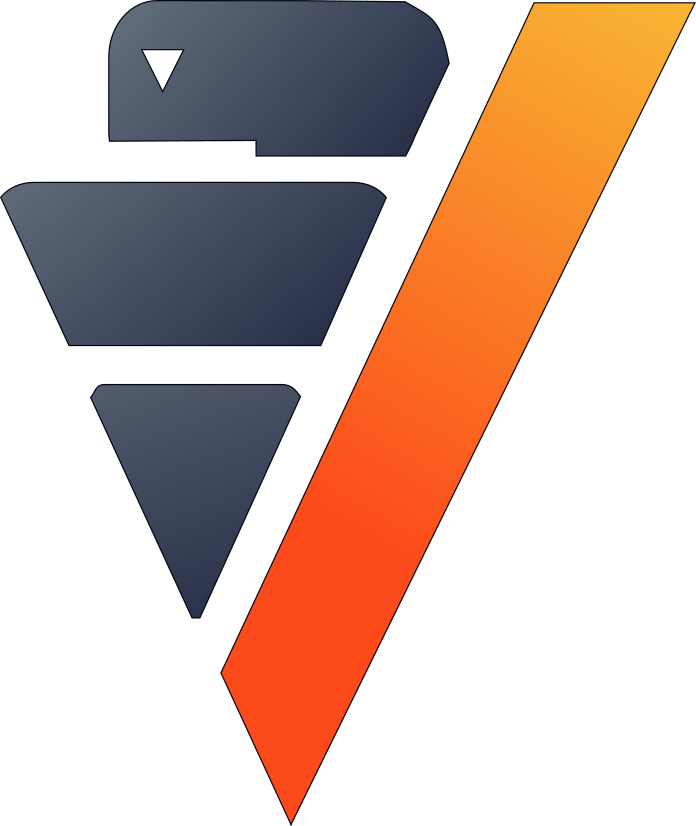

In [16]:
from verticapy.learn.delphi import AutoML

model = AutoML("creditcard_autoML",
               estimator="native",
               metric="prc_auc",
               estimator_type="binary",
               preprocess_data=False,
               lmax=3,
               stepwise=False)
model.fit(creditcard, 
          X=predictors,
          y=response,)

<AxesSubplot:xlabel='time', ylabel='score'>

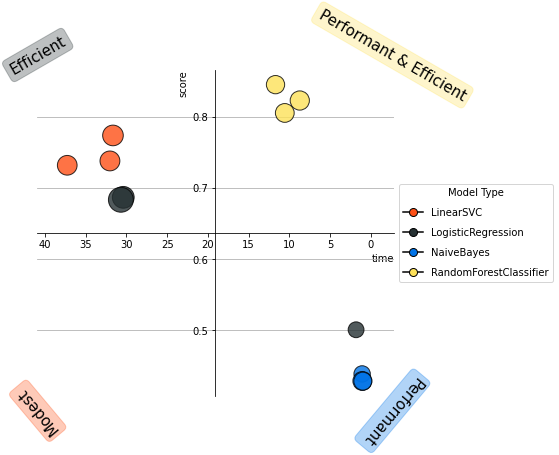

In [17]:
model.plot()

As expected, RandomForest models seem to be the best for this problem.

Generally speaking, working with anomalies means working with unsupervised models, so you can't expect to catch every anomaly. Supervised learning techniques are useful for dealing with already-identified anomalies, but what can we do in cases where the anomalies aren't already labeled? For this, we turn to unsupervised learning techniques.

<h3>Unsupervised Learning</h3>

There are many unsupervised learning techniques, but not all of them will be useful for detecting anomalies. Since there's no rigid mathematical definition for what an outlier is, finding anomalies becomes somewhat subjective.

To solve this problem, we have to evaluate our constraints and needs. Do we need to find anomalies in real-time? Do we have a time constraint?

<ul class="ul_content">
    <li><b>Real-time:</b> We don't have access to historical data, so we need an easy way to preprocess the data that is wholly independent from historical data, and the model must be simple to deploy at the source of the data stream. For example, we might use simple preprocessing techniques like normalization, standardization or One-Hot Encoding instead of more complex ones like  windows, interpolation, or intersection. Isolation forests, k-means, robust PCA, or global outlier detection using z-score would be ideal, whereas local outlier factor, DBSCAN, or other hard-to-deploy methods cannot be used.</li>
    <li><b>Near Real-time:</b> We have access to historical data and our preprocessing method must be fast. The model has to be simple to score with. We can use any preprocessing technique as long as it is fast enough, which of course varies. Since this is still a real-time use case, we should still avoid any hard-to-deploy algorithms like DBSCAN or local outlier factor.</li>
    <li><b>No time constraint:</b> We can use any techniques we want.</li>
</ul>

Due to the complexity of the computations, anomalies are difficult to detect in the context of "Big Data." We have three efficient methods for that case:
<ul class="ul_content">
 <li>Machine Learning : We need to use easily-deployable algorithms to perform real-time fraud detection. Isolation forests and k-means can be easily deployed and they work well for detecting anomalies.</li>
 <li>Rules & Thresholds : The z-score can be an efficient solution for detecting global outliers.</li>
    <li>Decomposition : Robust PCA is another technique for detecting outliers.</li>
</ul>

Before using these techniques, let's draw some scatter plots to get a better idea of what kind of anomalies we can expect.

<Axes3DSubplot:xlabel='"V12"', ylabel='"V17"'>

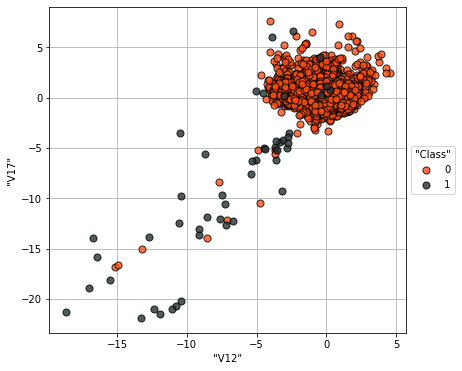

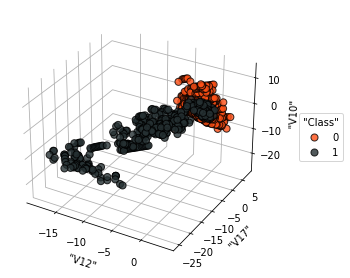

In [18]:
creditcard.scatter(['V12','V17'], 
                   catcol='Class', 
                   max_nb_points=5000000)
creditcard.scatter(['V12','V17','V10'], 
                   catcol="Class")

In this case, the anomalies seem pretty clear global outliers of the distributions. When doing unsupervised learning, we don't have this information in advance.

For the rest of this example, we'll investigate labels and how they can help us understand the efficacy of each technique.

<b>k-means Clustering</b>

We begin by examining k-means clustering, which partitions the data into k clusters.

We can use an elbow curve to find a suitable number of clusters. We can then add more clusters then the amount suggested by the elbow curve to create clusters mainly composed of anomalies. Clusters with relatively fewer elements can then be investigated by an expert to label the anomalies.

From there, we perform the following procedure:
<ul class="ul_content">
 <li>Label historical data by looking at unsupervised learning results.</li>
 <li>Use supervised learning models to learn on the labeled anomalies. This model will be brought to the source of the data stream.</li>
</ul>

Once we deploy the unsupervised model and can reliably detect suspicious transactions, we could block them and contact the cardholder about potential fraudulent activity on their card.

Within-Cluster SS  
1                          0.0  
2          0.10301141453094219  
3          0.18470496436710465  
4          0.26295225639321923  
5           0.3506521119959812  
6          0.33200568413591613  
7           0.5069397763735227  
8            0.583865243007515  
9           0.5979260244194577  
10          0.5680738509485603  
11          0.6046772012550364  
12          0.6022210107347897  
13          0.6256539031028394  
14           0.656108408415182  
15          0.6578458699981382  
16          0.6853788869599392  
17           0.689382058576267  
18          0.6487220060702656  
19           0.694863029069454  
20          0.7197697978476898  
21            0.71573062823312  
22          0.7069680211920246  
23          0.7175185848841286  
24          0.7112853953873168  
25          0.7223990050850614  
26          0.7382972977415997  
27          0.7411632980986742  
28          0.7483175485271444  
29          0.7527193360403196  
30          0.7320124127337184  
31          0.7450887926410549  
32          0.7535736844539953  
33          0.7634829668987395  
34          0.7692676647674944  
35          0.7488553011219554  
36          0.7632997425929033  
37          0.7689664835545041  
38          0.7815499554421549  
39          0.7703325418310426  
40          0.7790174029829863  
41          0.7827923757340767  
42          0.7884709299725007  
43          0.7848945273179159  
44          0.7860335718799665  
45          0.7950810891611847  
46           0.775993357038897  
47          0.7968347299634018  
48          0.7996943075680286  
49          0.8036842131420985  
Rows: 1-49 | Columns: 2
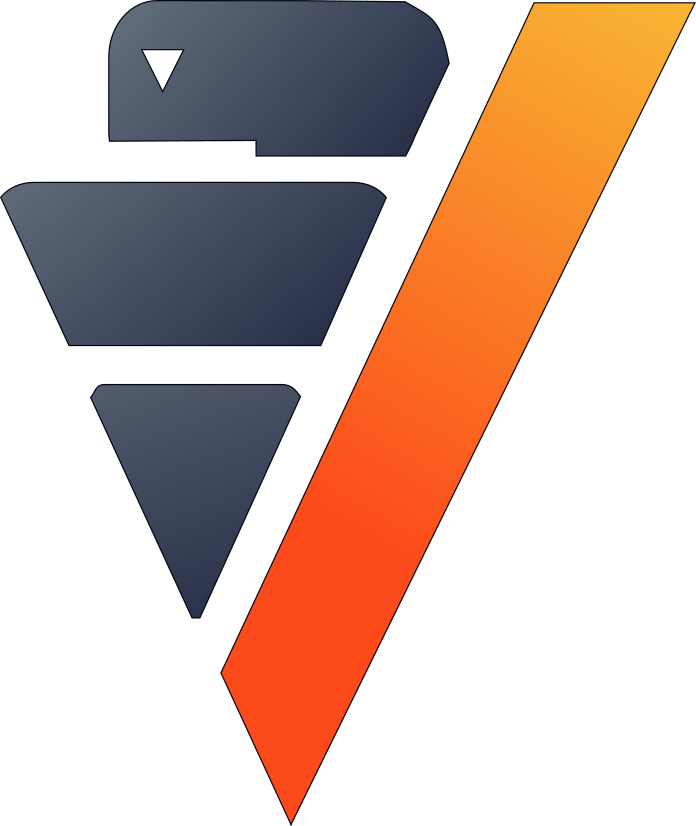

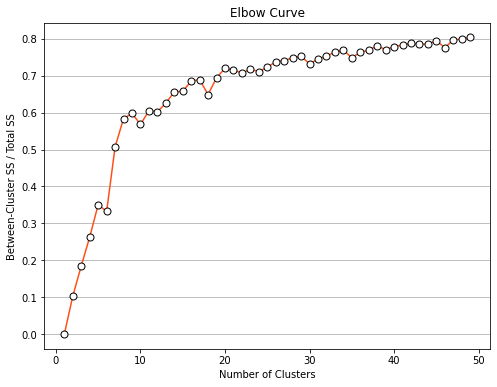

In [19]:
from verticapy.learn.model_selection import elbow
elbow(creditcard,
      ['V12','V17','V10','V14','V16'], 
      n_cluster = (1, 50))

10 seems to be a suitable number of clusters, so let's try out 20 clusters and see if the collective outliers cluster together. We can then then evaluate each cluster independently and see which clusters have the most anomalies.

In [20]:
from verticapy.learn.cluster import KMeans
model = KMeans("kmeans_creditcard", 
               n_cluster=20)
model.fit(creditcard, ['V12','V17','V10'])



centers
   v12   |   v17   |   v10   
---------+---------+---------
-2.04675 | 0.48324 |-0.77136 
 0.98906 |-0.54080 | 0.02254 
 0.10836 |-0.49964 | 0.88022 
-14.40860|-17.50052|-12.65431
-0.19470 | 2.35984 |-1.29623 
-0.03794 |-0.44639 | 4.07886 
-0.15428 | 0.58260 |-0.82174 
-4.74226 |-4.40741 |-4.01494 
 0.78299 |-0.19690 |-1.37110 
-7.64190 |-10.90211|-6.77121 
 0.47580 | 0.06662 |-0.19470 
 1.10568 | 0.82862 |-0.51924 
-0.03085 |-0.68977 | 8.60942 
-10.51363|-14.47357|-21.29895
-0.15018 | 0.79567 | 0.47628 
-0.18150 | 0.22584 | 1.68330 
-2.88540 | 0.74964 | 0.29165 
-1.10041 | 0.20309 | 1.03785 
 0.16090 |-0.68495 |-0.28921 
-0.54121 |-0.21848 |-0.06482 


metrics
Evaluation metrics:
     Total Sum of Squares: 827461.47
     Within-Cluster Sum of Squares: 
         Cluster 0: 11259.604
         Cluster 1: 9105.9827
         Cluster 2: 11810.597
         Cluster 3: 1732.5868
         Cluster 4: 10524.6
         Cluster 5: 7555.2063
         Cluster 6: 9274.2298
         Cluster 7

Let's direct our attention to the smallest clusters.

cluster    total          percent_fraud             total_fraud  
1          13       12                  100.0    0.024390243902439025  
2           3       96                 78.125      0.1524390243902439  
3           9      117        82.051282051282      0.1951219512195122  
4           7      234       79.4871794871795      0.3780487804878049  
5          12      880                    0.0                     0.0  
6           5     2575     0.0776699029126214    0.004065040650406504  
7           4     5525      0.597285067873303     0.06707317073170732  
8          16     5779      0.224952413912442    0.026422764227642274  
9          15    11788     0.0169664065151001    0.004065040650406504  
10          0    13360      0.149700598802395     0.04065040650406504  
11         11    14835     0.0202224469160768    0.006097560975609756  
12         17    16401     0.0121943783915615    0.004065040650406504  
13         14    16435     0.0912686340127776     0.03048780487804878  
14          8    16823     0.0237769720026155    0.008130081300813007  
15          6    22159     0.0406155512432872    0.018292682926829267  
16         19    24865     0.0281520209129298    0.014227642276422764  
17          2    26990     0.0222304557243423    0.012195121951219513  
18          1    32637    0.00919202132548948    0.006097560975609756  
19         18    36169    0.00552959716884625    0.004065040650406504  
20         10    37126    0.00538706028120455    0.004065040650406504  
Rows: 1-20 | Columns: 4
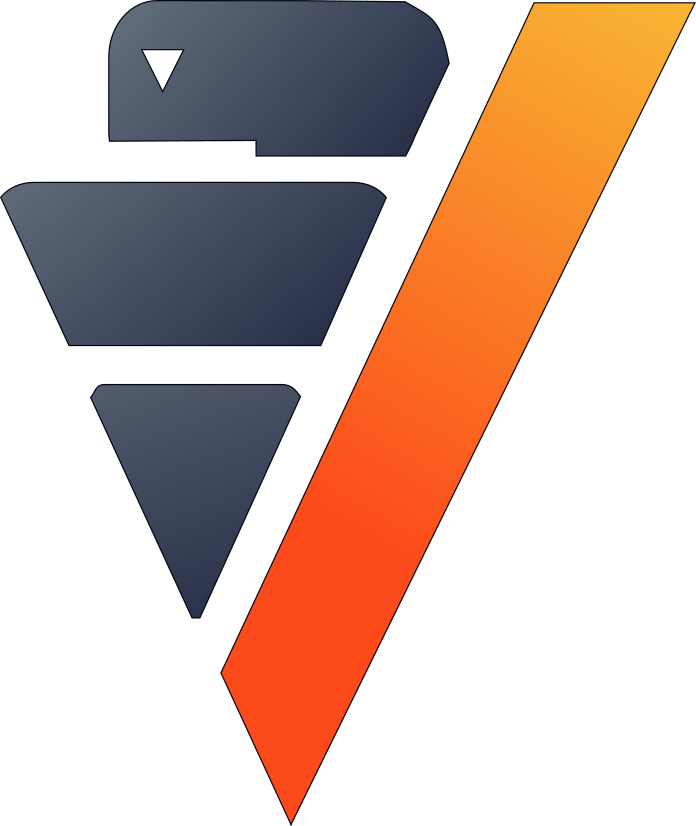

In [21]:
model.predict(creditcard, name = "cluster")
creditcard.groupby(["cluster"], ["COUNT(*) AS total", 
                                 "100 * AVG(Class) AS percent_fraud",
                                 "SUM(Class) / 492 AS total_fraud"]).sort("total")

Notice that clusters with fewer elemenets tend to contain much more fraudulent events than the others. This methodology makes k-means a good algorithm for catching collective outliers. Combining k-means with other techniques like z-score, we can find most of the outliers of the distribution.

<b>Outliers of the distribution</b>

Let's use the z-score to detect global outliers of the distribution.

global_outliers     total         percent_fraud           total_fraud  
1                  1      1871      18.7600213789417    0.7134146341463414  
2                  0    282935    0.0498347677028293    0.2865853658536585  
Rows: 1-2 | Columns: 4
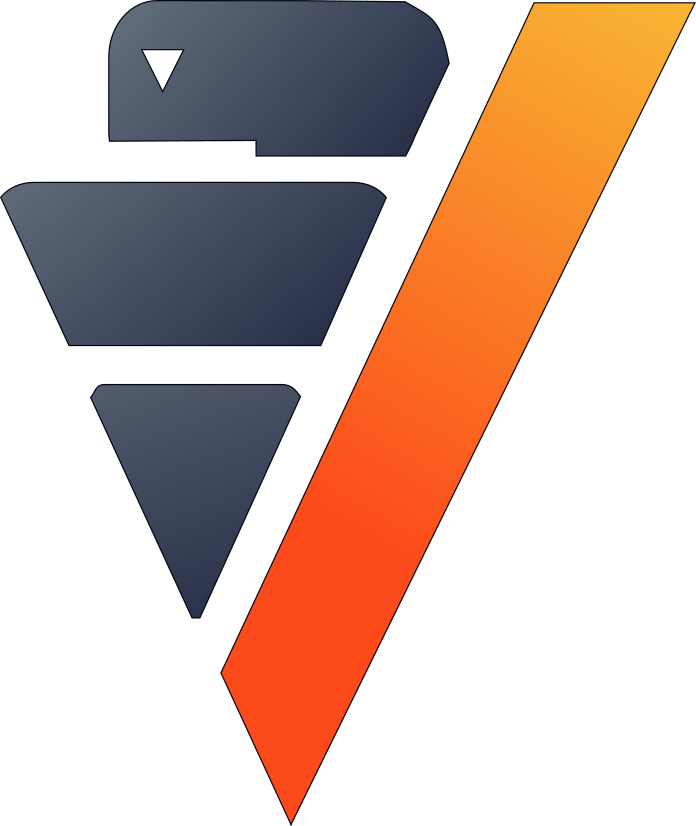

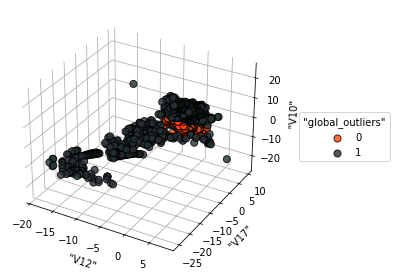

In [22]:
creditcard.outliers(['V12','V17','V10'], 
                    name="global_outliers", 
                    threshold=5)
creditcard.scatter(['V12','V17','V10'], 
                   catcol="global_outliers")
creditcard.groupby(["global_outliers"], ["COUNT(*) AS total", 
                                         "100 * AVG(Class) AS percent_fraud",
                                         "SUM(Class) / 492 AS total_fraud"]).sort("total")

<AxesSubplot:xlabel='"V12"', ylabel='"V17"'>

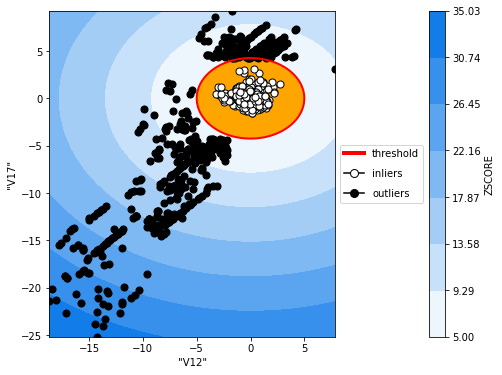

In [23]:
creditcard.outliers_plot(['V12','V17',],
                         threshold=5.0,)

We can see that we can caught more than 71% of the fraudulent activity in less than 1% of the dataset.

<b>Neighbors</b>

Other algorithms could be used to solve the problem with more precision if we could use a more powerful clustering method and didn't have a time constraint. Based on neighbors, these algorithms are very computationally expensive. An example of this kind of algorithm is the local outlier factor.

<Axes3DSubplot:xlabel='"V12"', ylabel='"V17"'>

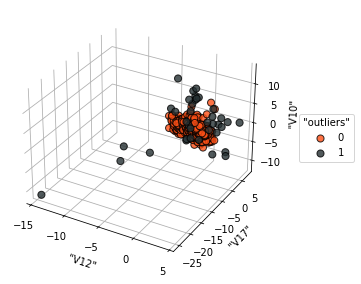

In [24]:
from verticapy.learn.neighbors import LocalOutlierFactor
model = LocalOutlierFactor("lof_creditcard",)
model.fit(creditcard.sample(x=0.01), ['V12','V17','V10'])
lof_creditcard = model.predict()

lof_creditcard["outliers"] = "(CASE WHEN lof_score > 2 THEN 1 ELSE 0 END)"
lof_creditcard.scatter(['V12','V17','V10'], catcol = "outliers")

We can catch outliers with a neighbors score. Again, the main problem with these sorts of algorithms is that what they have in precision, they lack in speed, which makes them unsuitable for scoring new data. This is why it's important to focus on scalable techniques like k-means.

<b>Other Techniques</b>

Other scalable techniques that can solve this problem are robust PCA and isolation forest.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!